In [18]:
"""
THQ2 - Question 3      G.Lawrence  83186557
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#############################################################################
## (a) Read Student Results Data
#############################################################################
dataset=pd.read_csv('./student_results.csv')
dataset.head(2)

,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,Assessment 4,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category
0,54002768,17.21,24.19,0.0,0.00,15.0,18.92,26.57,0.00,0.00,0.00,50.0,2.00,69,9,cl9tg2,domestic
1,54005658,66.50,0.00,22.0,18.14,29.0,19.91,22.35,17.04,60.54,24.07,42.5,1.88,63,2,cl2tg8,domestic


In [20]:
#############################################################################
## (b) Replace nulls (NA) with zeroes (0)
#############################################################################
dataset.isnull().any()     # see what fields have nulls before update
dataset = dataset.fillna(value = 0)  # update NAs to 0 
dataset.isnull().any()  # confirm no fields have nulls *after* update

ID number             False
Assessment 1          False
Assessment 2          False
Online quiz 1         False
Online quiz 2         False
Online quiz 3         False
Online quiz 4         False
Group assignment 1    False
Group assignment 2    False
Assessment 3          False
Assessment 4          False
Group assignment 3    False
 Group evaluation     False
Final exam            False
Class No              False
groupname             False
Student category      False
dtype: bool

In [23]:
#############################################################################
## (c) Get Total.marks and plot
#############################################################################
  ## setup lookup table 1 as a dataframe
Tab1 = pd.DataFrame(
  {'AssName': ['Assessment 1','Assessment 2','Assessment 3','Assessment 4', 
      'Online quiz 1 ','Online quiz 2','Online quiz 3','Online quiz 4',
      'Group assignment 1','Group assignment 2','Group assignment 3', 
      ' Group evaluation','Final exam'],
   'FullMarks': [70,30,70,30,     30,20,30,20,     30,20,50,      2,100],
   'TotWeight': [.07,.03,.07,.03, .03,.02,.03,.02, .024,.016,.04, .02,.6] },
  columns = ['AssName','FullMarks','TotWeight'])
  ## double-check that Weights add to 1
Tab1.TotWeight.sum()
Tab1  # display the table
  
  ## define a function to calculate Total.marks for each ID
def GetTot(id0):
  tot0 = 0.0
  for ass in Tab1.AssName :
    wt0 = float(Tab1[Tab1['AssName']==ass]['TotWeight'])
    max0 = float(Tab1[Tab1['AssName']==ass]['FullMarks'])
    raw0 = float(dataset[dataset['ID number']==id0][ass])
    tot0 += (100 * raw0 / max0) * wt0
    #print("i=%d a=%20s raw=%5.2f tot=%.2f" % (id0,ass,raw0,tot0))
  return(tot0)

  ## update the Total.marks column by applying the function for each ID
dataset['Total.marks'] = dataset['ID number'].apply(GetTot)
dataset.head(4)

,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,Assessment 4,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category,Total.marks
0,54002768,17.21,24.19,0.0,0.00,15.00,18.92,26.57,0.00,0.00,0.00,50.0,2.00,69,9,cl9tg2,domestic,57.0576
1,54005658,66.50,0.00,22.0,18.14,29.00,19.91,22.35,17.04,60.54,24.07,42.5,1.88,63,2,cl2tg8,domestic,70.2472
2,54010438,0.00,0.00,0.0,0.00,4.13,0.00,18.86,0.00,43.75,0.00,22.5,0.00,15,3,cl3tg7,international,17.0968
3,54011658,60.67,29.07,27.5,18.40,24.50,18.52,25.00,19.29,66.11,27.61,35.0,1.72,75,20,cl20tg2,domestic,80.3012


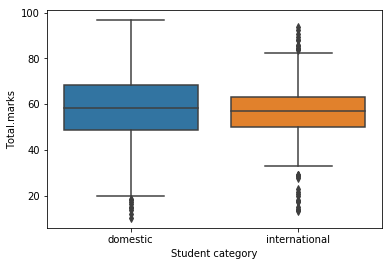

In [24]:
#############################################################################
## (c continued) display a boxplot of total marks split by student category
#############################################################################
sns.boxplot(x=dataset["Student category"], y=dataset["Total.marks"])
plt.show()

In [25]:
#############################################################################
## (d) stats for each class into stat.table
#############################################################################
g1 = dataset.groupby("Class No")
StatTable = g1["Total.marks"].agg([np.mean,np.var,np.std])
  ## display the StatTable
StatTable  

,mean,var,std
Class No,,,
1,59.280813,242.710561,15.579171
2,60.671069,160.151821,12.655110
3,57.610713,273.495919,16.537712
4,56.220069,319.034109,17.861526
5,57.918085,383.676678,19.587666
6,62.332600,252.025294,15.875305
7,54.879626,344.554792,18.562187
8,54.384800,358.580091,18.936211
9,53.918419,205.356479,14.330264


In [27]:
#############################################################################
## (e) determine Grade from Total.marks and table 2
#############################################################################
  ## setup lookup table 2 as a dataframe
Tab2 = pd.DataFrame(
  {'Grade': ['HD','D','Cr','P','F'],
   'Detail': ['High Distinction','Distinction','Credit','Pass','Fail'],
   'RangeGE': [85.0,     75.0, 65.0, 50.0, 0.0], 
   'RangeLT': [100.0001, 85.0, 75.0, 65.0, 50.0] },
  columns = ['Grade','Detail','RangeGE', 'RangeLT'])
Tab2  # display table 2
  
  ## define a function to calculate Grade from Total.marks and Table 2
def GetGrade(id1):
  tot1 = float(dataset[dataset['ID number']==id1]['Total.marks'])
  grade1 = "F"  #default
  for j in range(len(Tab2)):
    j_GE = float(Tab2.RangeGE[j:j+1])
    j_LT = float(Tab2.RangeLT[j:j+1])
    j_Grade = Tab2.Grade[j:j+1].to_string(header=None,index=None)
    type(j_GE); type(j_LT)
    if tot1 >= j_GE and tot1 < j_LT :
      #print("j=",j," tot=",tot1," grade=",j_Grade)
      grade1 = j_Grade
  return(grade1)
  
  ## use Total.marks and Table 2 to determine Grade per ID/student
Grade = dataset['ID number'].apply(GetGrade)
  ## also add Grade to main dataframe and show top portion
dataset['Grade'] = Grade
dataset.head(5)

,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,Assessment 4,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category,Total.marks,Grade
0,54002768,17.21,24.19,0.0,0.00,15.00,18.92,26.57,0.00,0.00,0.00,50.0,2.00,69,9,cl9tg2,domestic,57.0576,P
1,54005658,66.50,0.00,22.0,18.14,29.00,19.91,22.35,17.04,60.54,24.07,42.5,1.88,63,2,cl2tg8,domestic,70.2472,Cr
2,54010438,0.00,0.00,0.0,0.00,4.13,0.00,18.86,0.00,43.75,0.00,22.5,0.00,15,3,cl3tg7,international,17.0968,F
3,54011658,60.67,29.07,27.5,18.40,24.50,18.52,25.00,19.29,66.11,27.61,35.0,1.72,75,20,cl20tg2,domestic,80.3012,D
4,54012789,37.33,29.01,11.0,20.00,19.50,19.10,27.75,17.82,55.61,19.21,42.5,2.00,33,19,cl19tg6,domestic,49.9216,F


In [ ]:
#############################################################################
## (f) Regression Y=Total.marks  X=Assessment.1
#############################################################################


In [ ]:
#############################################################################
## (g) Regression Y=Total.marks  
##         X=Assessment.1, Assessment.3, Online.quiz.1, Group.assignment.2
#############################################################################


In [ ]:
#############################################################################
## (h) Determine Status; LogisticRegression (Y=Status X=Assessment.3)
#############################################################################
